In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import datapackage
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import statsmodels.api as sm

## investigating volatility linkages between oil, gas, and regionalised coal futures markets ##

## load data from Github into new frame and remove rows with absent data ##

url = 'https://raw.githubusercontent.com/joe-ascroft/phd/master/df-combined.csv'
df = pd.read_csv(url)
df["DATE"] = pd.to_datetime(df["DATE"],dayfirst=True)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col],errors='coerce')
    
df = df.dropna()
print(df)

           DATE    NCF    RCF    WTI    HH  Brent  NBP_UK  GBP-USD       NBP
1    2009-01-02  74.35  81.00  46.17  5.41  46.91   54.74   1.4453  7.911572
4    2009-01-05  77.65  84.40  48.61  5.83  49.62   56.66   1.4708  8.333553
5    2009-01-06  81.25  88.50  48.56  6.10  50.53   59.88   1.4919  8.933497
6    2009-01-07  78.65  86.25  42.75  5.89  45.86   58.03   1.5111  8.768913
7    2009-01-08  79.15  84.00  41.68  5.96  44.67   55.74   1.5202  8.473595
...         ...    ...    ...    ...   ...    ...     ...      ...       ...
4254 2020-08-25  49.75  48.90  43.17  2.54  45.86   24.61   1.3148  3.235723
4255 2020-08-26  49.70  48.95  43.21  2.52  45.64   25.10   1.3193  3.311443
4256 2020-08-27  49.80  48.90  42.88  2.52  45.09   26.68   1.3206  3.523361
4257 2020-08-28  50.60  52.20  42.96  2.46  45.81   28.95   1.3344  3.863088
4260 2020-08-31  51.95  52.90  42.61  2.30  45.28   28.95   1.3379  3.873220

[2856 rows x 9 columns]


In [4]:
## price return calculations ##

for col in df.columns[1:9]:
    df[col+'_r'] = (df[col].pct_change())
df = df.dropna()
print(df)

           DATE    NCF    RCF    WTI    HH  Brent  NBP_UK  GBP-USD       NBP  \
4    2009-01-05  77.65  84.40  48.61  5.83  49.62   56.66   1.4708  8.333553   
5    2009-01-06  81.25  88.50  48.56  6.10  50.53   59.88   1.4919  8.933497   
6    2009-01-07  78.65  86.25  42.75  5.89  45.86   58.03   1.5111  8.768913   
7    2009-01-08  79.15  84.00  41.68  5.96  44.67   55.74   1.5202  8.473595   
8    2009-01-09  76.90  83.50  40.69  5.60  44.42   56.42   1.5111  8.525626   
...         ...    ...    ...    ...   ...    ...     ...      ...       ...   
4254 2020-08-25  49.75  48.90  43.17  2.54  45.86   24.61   1.3148  3.235723   
4255 2020-08-26  49.70  48.95  43.21  2.52  45.64   25.10   1.3193  3.311443   
4256 2020-08-27  49.80  48.90  42.88  2.52  45.09   26.68   1.3206  3.523361   
4257 2020-08-28  50.60  52.20  42.96  2.46  45.81   28.95   1.3344  3.863088   
4260 2020-08-31  51.95  52.90  42.61  2.30  45.28   28.95   1.3379  3.873220   

         NCF_r     RCF_r     WTI_r     

In [5]:
## markov regime switching for univariate analysis ##

mod = sm.tsa.MarkovRegression(df["HH_r"], k_regimes=3, order=10, switching_variance = True)
res_mod = mod.fit()
res_mod.summary()

/Users/joe/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/joe/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                   HH_r   No. Observations:                 2855
Model:               MarkovRegression   Log Likelihood               15018.936
Date:                Thu, 06 May 2021   AIC                         -30013.871
Time:                        13:12:31   BIC                         -29942.389
Sample:                             0   HQIC                        -29988.094
                               - 2855                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.952e-15   9.89e-16      9.049      0.000    7.01e-15    1.09e-14
sigma2      1.845e-28   5.42e-10    3.4e-19      1.000   -1.06e-09    1.06e-09
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028   9.72e-13   2.88e+09      0.000       0.003       0.003
sigma2         0.0013   9.57e-19   1.39e+15      0.000       0.001       0.001
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0668   9.72e-13   6.88e+10      0.000       0.067       0.067
sigma2         0.0556   1.06e-22   5.24e+20      0.000       0.056       0.056
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.2846   3.42e-13   8.33e+11      0.000       0.285       0.285
p[1->0]        0.1704    5.7e-13   2.99e+11      0.000       0.170       0.170
p[2->0]        0.1458   6.67e-13   2.19e+11      0.000       0.146       0.146
p[0->1]        0.6879   1.41e-13   4.87e+12      0.000       0.688       0.688
p[1->1]        0.8071    1.2e-13    6.7e+12      0.000       0.807       0.807
p[2->1]        0.4660   2.09e-13   2.23e+12      0.000       0.466       0.466
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 7.52e+48. Standard errors may be unstable.
"""

<AxesSubplot:title={'center':'Probability of being in the high regime'}>

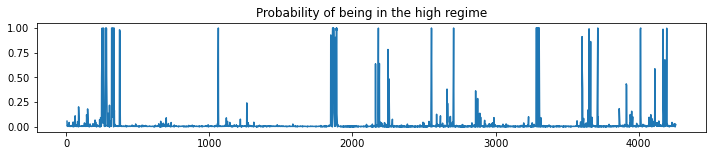

In [6]:
res_mod.filtered_marginal_probabilities[2].plot(
    title='Probability of being in the high regime', figsize=(12,2))

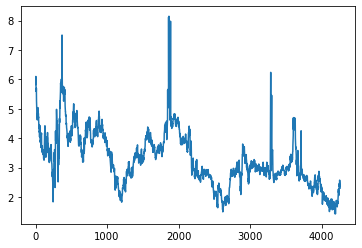

In [8]:
plt.plot(df["HH"])